Markov Chain Bases

In [15]:
# import numpy as np
# import matplotlib.pyplot as plt

# transfer_matrix = np.array([[0.9,0.075,0.025],[0.15,0.8,0.05],[0.25,0.25,0.5]],dtype='float32')
# start_matrix = np.array([[0.3,0.4,0.3]],dtype='float32')

# value1 = []
# value2 = []
# value3 = []
# for i in range(100):
#     start_matrix = np.dot(start_matrix, transfer_matrix)
#     value1.append(start_matrix[0][0])
#     value2.append(start_matrix[0][1])
#     value3.append(start_matrix[0][2])
# print(start_matrix)

# x = np.arange(100)
# plt.plot(x,value1,label='Bull market')
# plt.plot(x,value2,label='Bear market')
# plt.plot(x,value3,label='Stagnant market')
# plt.legend()
# plt.show()

In [16]:
# import numpy as np
# import matplotlib.pyplot as plt

# transfer_matrix = np.array([[0.9,0.075,0.025],[0.15,0.8,0.05],[0.25,0.25,0.5]],dtype='float32')
# start_matrix = transfer_matrix
# p11 = []
# p12 = []
# p13 = []
# p21 = []
# p22 = []
# p23 = []
# p31 = []
# p32 = []
# p33 = []
# for i in range(100):
#     start_matrix = np.dot(start_matrix, transfer_matrix)
#     p11.append(start_matrix[0][0])
#     p12.append(start_matrix[0][1])
#     p13.append(start_matrix[0][2])
#     p21.append(start_matrix[1][0])
#     p22.append(start_matrix[1][1])
#     p23.append(start_matrix[1][2])
#     p31.append(start_matrix[2][0])
#     p32.append(start_matrix[2][1])
#     p33.append(start_matrix[2][2])
# print(start_matrix)

# x = np.arange(100)
# plt.plot(x,p11,label='p11')
# plt.plot(x,p12,label='p12')
# plt.plot(x,p13,label='p13')
# plt.plot(x,p21,label='p21')
# plt.plot(x,p22,label='p22')
# plt.plot(x,p23,label='p23')
# plt.plot(x,p31,label='p31')
# plt.plot(x,p32,label='p32')
# plt.plot(x,p33,label='p33')
# plt.legend(loc='right')
# plt.show()

Data Acquirement by Polygon

In [17]:
# from datetime import date, datetime
# from typing import Any, Dict, Iterator, List, Optional, Union

# import pandas as pd
# import pytz
# from polygon import RESTClient
# from polygon.rest.models import (
#     Agg,
#     DailyOpenCloseAgg,
#     GroupedDailyAgg,
#     PreviousCloseAgg,
#     Sort,
# )
# from polygon.rest.models.request import RequestOptionBuilder
# from urllib3 import HTTPResponse

# import yfinance as yf
# import pandas as pd

# import requests
# from bs4 import BeautifulSoup
# from datetime import datetime, timedelta

# # Function to get the Polygon RESTClient
# def get_client():
#     return RESTClient("VoUAUxVML9mwSpopBIK7vPjIF_Y25Yk5")  # Replace with your actual API key

# # Function to get stock data for a specific company within a time window
# def get_stock_data(client, ticker, start_date, end_date):
#     stock_data = list_aggs(
#         client, ticker, 1, "month", start_date, end_date, limit=50000
#     )
#     return stock_data

# # TODO: Account for market holidays and half-days
# # TODO: Determine timezone from stock/equity ticker
# def within_trading_hours(
#     timestamp: Union[str, int, datetime, date], timezone: str
# ) -> bool:
#     """
#     Determine whether a given instant is within trading hours for a particular exchange.

#     :param timestamp: The timestamp (in milliseconds) to be checked.
#     :param timezone: The timezone to check trading hours in, as a IANA Time Zone Database Name.
#     :return: True if the timestamp is within trading hours, False otherwise.
#     """
#     dt = datetime.fromtimestamp(timestamp / 1000, tz=pytz.timezone(timezone))
#     if dt.weekday() < 5:
#         opening_time = dt.replace(hour=9, minute=30, second=0, microsecond=0)
#         closing_time = dt.replace(hour=16, minute=0, second=0, microsecond=0)
#         return opening_time <= dt <= closing_time
#     else:
#         return False


# # TODO: Determine timezone from stock/equity ticker
# def parse_timestamp(timestamp: Union[str, int, datetime, date], timezone: str) -> str:
#     """
#     Parse a timestamp to a readable format for easy comparisons.

#     :param timestamp: The timestamp (in milliseconds) to be formatted.
#     :param timezone: The timezone to check trading hours in, as a IANA Time Zone Database Name.
#     :return: Date-time representation in the following format: %Y-%m-%d %H:%M:%S %Z.
#     """
#     dt = datetime.fromtimestamp(timestamp / 1000, tz=pytz.timezone(timezone))
#     return dt.strftime("%Y-%m-%d %H:%M:%S %Z")


# def agg_to_dict(agg: Agg):
#     """
#     Convert an aggregate object to a dictionary, and add any extra data that may be useful.

#     :param agg: The aggregate object to parse.
#     :return: Dictionary with keys corresponding to attributes of the object.
#     """
#     return {
#         "open": agg.open,
#         "high": agg.high,
#         "low": agg.low,
#         "close": agg.close,
#         "volume": agg.volume,
#         "vwap": agg.vwap,
#         "timestamp": agg.timestamp,
#         "datetime": parse_timestamp(agg.timestamp, "America/New_York"),
#         "transactions": agg.transactions,
#         "otc": agg.otc,
#     }


# def list_aggs(
#     client: RESTClient,
#     ticker: str,
#     multiplier: int,
#     timespan: str,
#     # "from" is a keyword in python https://www.w3schools.com/python/python_ref_keywords.asp
#     from_: Union[str, int, datetime, date],
#     to: Union[str, int, datetime, date],
#     include_extended_hours: bool = False,
#     adjusted: Optional[bool] = None,
#     sort: Optional[Union[str, Sort]] = None,
#     limit: Optional[int] = None,
#     params: Optional[Dict[str, Any]] = None,
#     raw: bool = False,
#     options: Optional[RequestOptionBuilder] = None,
# ) -> pd.DataFrame:
#     """
#     List aggregate bars for a ticker over a given date range in custom time window sizes.

#     :param client: The RESTClient object to perform the request with.
#     :param ticker: The ticker symbol.
#     :param multiplier: The size of the timespan multiplier.
#     :param timespan: The size of the time window.
#     :param from_: The start of the aggregate time window as YYYY-MM-DD, a date, Unix MS Timestamp, or a datetime.
#     :param to: The end of the aggregate time window as YYYY-MM-DD, a date, Unix MS Timestamp, or a datetime.
#     :param include_extended_hours: True if pre-market and after-hours trading data are to be included, False otherwise.
#     :param adjusted: Whether or not the results are adjusted for splits. By default, results are adjusted. Set this to false to get results that are NOT adjusted for splits.
#     :param sort: Sort the results by timestamp. asc will return results in ascending order (oldest at the top), desc will return results in descending order (newest at the top).The end of the aggregate time window.
#     :param limit: Limits the number of base aggregates queried to create the aggregate results. Max 50000 and Default 5000. Read more about how limit is used to calculate aggregate results in Polygon's on Aggregate Data API Improvements.
#     :param params: Any additional query params.
#     :param raw: Return raw object instead of results object.
#     :return: Pandas DataFrame representation of aggregate objects.
#     """
#     aggs = []
#     for a in client.list_aggs(
#         ticker,
#         multiplier,
#         timespan,
#         from_,
#         to,
#         adjusted=adjusted,
#         sort=sort,
#         limit=limit,
#         params=params,
#         raw=raw,
#         options=options,
#     ):
#         if include_extended_hours or within_trading_hours(
#             a.timestamp, "America/New_York"
#         ):
#             aggs.append(agg_to_dict(a))
#     return pd.DataFrame(aggs)

# # NVIDIA stock ticker
# nvidia_ticker = "NVDA"

# # Start and end dates
# start_date = "2020-09-05"
# end_date = "2023-10-29"

# # Get the client
# client = get_client()

# # Fetch NVIDIA stock data
# nvidia_stock_data = get_stock_data(client, nvidia_ticker, start_date, end_date)

# # Display the data
# print(nvidia_stock_data)



Markov Chain Definition

In [18]:
from datetime import date, datetime
from typing import Any, Dict, Iterator, List, Optional, Union
import warnings

#suppress all warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pytz
from polygon import RESTClient
from polygon.rest.models import (
    Agg,
    DailyOpenCloseAgg,
    GroupedDailyAgg,
    PreviousCloseAgg,
    Sort,
)
from polygon.rest.models.request import RequestOptionBuilder
from urllib3 import HTTPResponse

import pandas as pd

import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

# Function to get the Polygon RESTClient
def get_client():
    return RESTClient("VoUAUxVML9mwSpopBIK7vPjIF_Y25Yk5")  # Replace with your actual API key

# Function to get stock data for a specific company within a time window
def get_stock_data(client, ticker, start_date, end_date):
    stock_data = list_aggs(
        client, ticker, 15, "hour", start_date, end_date, limit=500000
    )
    return stock_data

# TODO: Account for market holidays and half-days
# TODO: Determine timezone from stock/equity ticker
def within_trading_hours(
    timestamp: Union[str, int, datetime, date], timezone: str
) -> bool:
    """
    Determine whether a given instant is within trading hours for a particular exchange.

    :param timestamp: The timestamp (in milliseconds) to be checked.
    :param timezone: The timezone to check trading hours in, as a IANA Time Zone Database Name.
    :return: True if the timestamp is within trading hours, False otherwise.
    """
    dt = datetime.fromtimestamp(timestamp / 1000, tz=pytz.timezone(timezone))
    if dt.weekday() < 5:
        opening_time = dt.replace(hour=9, minute=30, second=0, microsecond=0)
        closing_time = dt.replace(hour=16, minute=0, second=0, microsecond=0)
        return opening_time <= dt <= closing_time
    else:
        return False

# TODO: Determine timezone from stock/equity ticker
def parse_timestamp(timestamp: Union[str, int, datetime, date], timezone: str) -> str:
    """
    Parse a timestamp to a readable format for easy comparisons.

    :param timestamp: The timestamp (in milliseconds) to be formatted.
    :param timezone: The timezone to check trading hours in, as a IANA Time Zone Database Name.
    :return: Date-time representation in the following format: %Y-%m-%d %H:%M:%S %Z.
    """
    dt = datetime.fromtimestamp(timestamp / 1000, tz=pytz.timezone(timezone))
    return dt.strftime("%Y-%m-%d %H:%M:%S %Z")


def agg_to_dict(agg: Agg):
    """
    Convert an aggregate object to a dictionary, and add any extra data that may be useful.

    :param agg: The aggregate object to parse.
    :return: Dictionary with keys corresponding to attributes of the object.
    """
    return {
        "open": agg.open,
        "high": agg.high,
        "low": agg.low,
        "close": agg.close,
        "volume": agg.volume,
        "vwap": agg.vwap,
        "timestamp": agg.timestamp,
        "datetime": parse_timestamp(agg.timestamp, "America/New_York"),
        "transactions": agg.transactions,
        "otc": agg.otc,
    }


def list_aggs(
    client: RESTClient,
    ticker: str,
    multiplier: int,
    timespan: str,
    # "from" is a keyword in python https://www.w3schools.com/python/python_ref_keywords.asp
    from_: Union[str, int, datetime, date],
    to: Union[str, int, datetime, date],
    include_extended_hours: bool = False,
    adjusted: Optional[bool] = None,
    sort: Optional[Union[str, Sort]] = None,
    limit: Optional[int] = None,
    params: Optional[Dict[str, Any]] = None,
    raw: bool = False,
    options: Optional[RequestOptionBuilder] = None,
) -> pd.DataFrame:
    """
    List aggregate bars for a ticker over a given date range in custom time window sizes.

    :param client: The RESTClient object to perform the request with.
    :param ticker: The ticker symbol.
    :param multiplier: The size of the timespan multiplier.
    :param timespan: The size of the time window.
    :param from_: The start of the aggregate time window as YYYY-MM-DD, a date, Unix MS Timestamp, or a datetime.
    :param to: The end of the aggregate time window as YYYY-MM-DD, a date, Unix MS Timestamp, or a datetime.
    :param include_extended_hours: True if pre-market and after-hours trading data are to be included, False otherwise.
    :param adjusted: Whether or not the results are adjusted for splits. By default, results are adjusted. Set this to false to get results that are NOT adjusted for splits.
    :param sort: Sort the results by timestamp. asc will return results in ascending order (oldest at the top), desc will return results in descending order (newest at the top).The end of the aggregate time window.
    :param limit: Limits the number of base aggregates queried to create the aggregate results. Max 50000 and Default 5000. Read more about how limit is used to calculate aggregate results in Polygon's on Aggregate Data API Improvements.
    :param params: Any additional query params.
    :param raw: Return raw object instead of results object.
    :return: Pandas DataFrame representation of aggregate objects.
    """
    aggs = []
    for a in client.list_aggs(
        ticker,
        multiplier,
        timespan,
        from_,
        to,
        adjusted=adjusted,
        sort=sort,
        limit=limit,
        params=params,
        raw=raw,
        options=options,
    ):
        if include_extended_hours or within_trading_hours(
            a.timestamp, "America/New_York"
        ):
            aggs.append(agg_to_dict(a))
    return pd.DataFrame(aggs)


import pandas as pd
import numpy as np
import yfinance as yf


# Function to calculate skewness-based states
def skewness_states(df, window):
    df['skewness'] = df['daily_returns'].rolling(window=window).skew()
    df['skewness_state'] = np.where(df['skewness'] > 0, 'Positive', 'Negative')
    return df

def volatility_states(df, window, k):
    # Calculate cumulative sum until sign change
    cur_sign = df["sign"].iloc[0]
    track = df['daily_returns'].iloc[0]
    cum_sum = [track]

    for i in range(1, len(df)):
        sign = df["sign"].iloc[i]
        if sign == cur_sign:
            track += df['daily_returns'].iloc[i]
            cum_sum.append(track)
        else:
            track = df['daily_returns'].iloc[i]
            cum_sum.append(track)
            cur_sign = sign

    df['cum_sum'] = cum_sum

    # Classification into states
    def classify(row):
        if row['cum_sum'] > 4 * k * row['rolling_std'] and row['sign'] == 1:
            return 4   
        elif row['cum_sum'] > 3 * k * row['rolling_std'] and row['sign'] == 1:
            return 3
        elif row['cum_sum'] > 2 * k * row['rolling_std'] and row['sign'] == 1:
            return 2
        elif row['cum_sum'] > 1 * k * row['rolling_std'] and row['sign'] == 1:
            return 1
        elif row['cum_sum'] < -4 * k * row['rolling_std'] and row['sign'] == -1:
            return -4
        elif row['cum_sum'] < -3 * k * row['rolling_std'] and row['sign'] == -1:
            return -3
        elif row['cum_sum'] < -2 * k * row['rolling_std'] and row['sign'] == -1:
            return -2
        elif row['cum_sum'] < -1 * k * row['rolling_std'] and row['sign'] == -1:
            return -1
        else:
            return 0

    df['volatility_state'] = df.apply(classify, axis=1)

    return df


def data_preprocessing(ticker):

    # Start and end dates
    start_date = "2000-11-21"
    end_date = "2023-11-21"

    # Get the client
    client = get_client()

    # Fetch NVIDIA stock data
    stock_data = get_stock_data(client, ticker, start_date, end_date)

    # tickers = ['AAPL', 'MSFT', 'AMZN']
    # start = '2019-11-22'
    # end = '2023-05-20'
    # stock_data = yf.download(tickers, start, end)

    return stock_data

ticker = "TSLA"
from sklearn.model_selection import train_test_split
stock_data = data_preprocessing(ticker)


df = stock_data[["datetime", "close", "open", "volume",'vwap','transactions']]
# df["date"] = df["datetime"].astype("datetime64[ns]")
df["daily_returns"] = df["close"].pct_change()
df["close"] = df["close"].shift(1) # shifted by 1 day as we want to predict the next day's price
df["volume"] = df["volume"].shift(1) # shifted by 1 day as we want we only know previous day's volume
df['rolling_std']  = df['daily_returns'].rolling(20).std()

df.dropna(inplace=True)
df["sign"] = np.sign(df["daily_returns"])

train_data, test_data = train_test_split(df, test_size=0.3, shuffle=False)

# Skewness
stock_data_with_skewness = skewness_states(train_data, window=20)

# Volatility
stock_data_with_skewness_and_volatility = volatility_states(stock_data_with_skewness, window=20, k=0.5)

# pd.set_option('display.max_rows', None)
# # Display the DataFrame with skewness information
# stock_data_with_skewness_and_volatility.head(40)

def classify_percentiles(series):
    low_threshold = series.quantile(0.2)
    medium_threshold = series.quantile(0.5)
    high_threshold = series.quantile(0.7)

    return pd.cut(series, bins=[float('-inf'), low_threshold, medium_threshold, high_threshold, float('inf')],
                  labels=['Very Low', 'Low', 'Medium', 'High'], include_lowest=True)


df = stock_data_with_skewness_and_volatility

df['price_level_state'] = classify_percentiles(df['close'])
df['volume_level_state'] = classify_percentiles(df['volume'])
df['transaction_level_state'] = classify_percentiles(df['transactions'])

def integrate_strategy(row):
    if row['price_level_state'] == 'Low' and row['volume_level_state'] == 'Low' and row['transaction_level_state'] == 'Low':
        return 'Conservative'
    elif row['price_level_state'] == 'High' and row['volume_level_state'] == 'High' and row['transaction_level_state'] == 'High':
        return 'Aggressive'
    else:
        return 'Neutral'

df['investment_strategy'] = df.apply(integrate_strategy, axis=1)

pd.set_option('display.max_rows', None)
# Display the DataFrame with skewness information
print(df.shape)

print(df['investment_strategy'].value_counts())


import pymc3 as pm
import numpy as np

def estimate_transition_probabilities(transition_counts, num_states):
    with pm.Model() as model:
        alpha = 1.0  # You can adjust alpha based on your needs
        dirichlet_process = pm.Dirichlet('dirichlet_process', a=np.ones(num_states) * alpha, shape=num_states)
        transition_probs = pm.Dirichlet('transition_probs', a=dirichlet_process, shape=(num_states, num_states))

        for i in range(num_states):
            pm.Multinomial(f'transitions_{i}', n=np.sum(transition_counts[i]), p=transition_probs[i], observed=transition_counts[i])

        trace = pm.sample(1000, tune=1000, chains=2)  # Increase or decrease sample and tune based on your needs

    # Calculate mean transition probabilities
    posterior_probs = np.mean(trace['transition_probs'], axis=0)
    return posterior_probs



import pandas as pd

# Create a multi-index DataFrame with all combinations of states
multi_index = pd.MultiIndex.from_product([df['skewness_state'].unique(), 
                                         df['volatility_state'].unique(), 
                                         df['investment_strategy'].unique()],
                                        names=['skewness_state', 'volatility_state', 'investment_strategy'])

transition_matrix = pd.DataFrame(0, index=multi_index, columns=multi_index, dtype=float)

# Iterate through the DataFrame and update the transition matrix
for i in range(1, len(df)):
    cur_row = (df['skewness_state'].iloc[i-1], df['volatility_state'].iloc[i-1], df['investment_strategy'].iloc[i-1])
    cur_col = (df['skewness_state'].iloc[i], df['volatility_state'].iloc[i], df['investment_strategy'].iloc[i])
    transition_matrix.loc[cur_row, cur_col] += 1


transition_prob = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)


import pandas as pd
import numpy as np
import pymc3 as pm

# Create a multi-index DataFrame with all combinations of states
multi_index = pd.MultiIndex.from_product([df['skewness_state'].unique(), 
                                         df['volatility_state'].unique(), 
                                         df['investment_strategy'].unique()],
                                        names=['skewness_state', 'volatility_state', 'investment_strategy'])

transition_matrix = pd.DataFrame(0, index=multi_index, columns=multi_index, dtype=float)

# Iterate through the DataFrame and update the transition matrix
for i in range(1, len(df)):
    cur_row = (df['skewness_state'].iloc[i-1], df['volatility_state'].iloc[i-1], df['investment_strategy'].iloc[i-1])
    cur_col = (df['skewness_state'].iloc[i], df['volatility_state'].iloc[i], df['investment_strategy'].iloc[i])
    transition_matrix.loc[cur_row, cur_col] += 1

# Normalize the transition matrix
transition_prob = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

# Estimate transition probabilities using Bayesian model
num_states = len(transition_matrix.columns)
transition_counts = transition_matrix.values
posterior_probs = estimate_transition_probabilities(transition_counts, num_states)

# Display the resulting transition probability matrix
print("Empirical Transition Probability Matrix:")
print(transition_prob)

print("\nEstimated Bayesian Transition Probability Matrix:")
print(posterior_probs)

# Create a multi-index DataFrame with all combinations of states
multi_index_states = pd.MultiIndex.from_product([df['skewness_state'].unique(), 
                                                df['volatility_state'].unique(), 
                                                df['investment_strategy'].unique()],
                                               names=['skewness_state', 'volatility_state', 'investment_strategy'])

# Create a DataFrame for posterior_probs with the same structure
posterior_probs_df = pd.DataFrame(posterior_probs, index=multi_index_states, columns=multi_index_states)

# print("Estimated Bayesian Transition Probability Matrix:")
# posterior_probs_df


(1246, 17)
Neutral         1120
Aggressive        69
Conservative      57
Name: investment_strategy, dtype: int64


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [transition_probs, dirichlet_process]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 154 seconds.
The chain contains only diverging samples. The model is probably misspecified.
The chain contains only diverging samples. The model is probably misspecified.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Empirical Transition Probability Matrix:
skewness_state                                       Negative               \
volatility_state                                            0                
investment_strategy                                   Neutral Conservative   
skewness_state volatility_state investment_strategy                          
Negative        0               Neutral              0.294118     0.000000   
                                Conservative         0.000000     0.166667   
                                Aggressive           0.333333     0.000000   
                1               Neutral              0.234375     0.000000   
                                Conservative              NaN          NaN   
                                Aggressive           0.333333     0.000000   
                3               Neutral              0.219512     0.000000   
                                Conservative         1.000000     0.000000   
                       

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Predict the next state at each time stamp using the Bayesian Transition Probability Matrix
def predict_next_state_max(cur_state, transition_prob):
    # Return the state with the maximum probability
    return transition_prob.loc[cur_state].idxmax()

df['state'] = list(zip(df['skewness_state'], df['volatility_state'], df['investment_strategy']))


df['predicted_next_state'] = df['state'].apply(lambda x: predict_next_state_max(x, posterior_probs_df))

# print(df['predicted_next_state'])


# Designing investment strategy
df['action'] = 0  

long_condition = (df['predicted_next_state'].apply(lambda x: x[1] in [0,1, 2, 3, 4])) 

# Criteria for going short: Negative sentiment or Aggressive category
short_condition = (df['predicted_next_state'].apply(lambda x: x[1] in [-1, -2, -3, -4]))


df.loc[long_condition, 'action'] = 1

# Set 'action' to -1 for short positions
df.loc[short_condition, 'action'] = -1

# Calculate returns and total returns
df["returns"] = df["close"].pct_change().shift(-1)
df["total_returns"] = abs(df["returns"]) * df["action"]

# df.set_index("date", inplace=True)

# Display the value counts of trading actions
# print(df["action"].value_counts())

# Plot cumulative returns
# df["total_returns"].cumsum().plot(label="Strategy returns", color='blue')
# df["returns"].cumsum().plot(color='red', label="Long Only returns")
# plt.legend()
# plt.ylabel("Cumulative Returns")
# plt.show()


In [20]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Predict the next state at each time stamp using the Bayesian Transition Probability Matrix
# def predict_next_state_max(cur_state, transition_prob):
#     # Return the state with the maximum probability
#     return transition_prob.loc[cur_state].idxmax()

# df['state'] = list(zip(df['skewness_state'], df['volatility_state'], df['investment_strategy']))

# df['predicted_next_state'] = df['state'].apply(lambda x: predict_next_state_max(x, posterior_probs_df))

# print(df['predicted_next_state'])

# # Designing investment strategy
# df['action'] = 0  

# long_condition = (df['predicted_next_state'].apply(lambda x: x[0]) == 'Positive')

# short_condition = (df['predicted_next_state'].apply(lambda x: x[0]) == 'Negative')


# df.loc[long_condition, 'action'] = 1
# df.loc[short_condition, 'action'] = -1

# # Calculate returns and total returns
# df["returns"] = df["close"].pct_change().shift(-1)
# df["total_returns"] = abs(df["returns"]) * df["action"]

# # df.set_index("date", inplace=True)

# print(df["action"].value_counts())

# # Plot cumulative returns
# df["total_returns"].cumsum().plot(label="Strategy returns", color='blue')
# df["returns"].cumsum().plot(color='red', label="Long Only returns")
# plt.legend()
# plt.ylabel("Cumulative Returns")
# plt.show()


Testing

In [21]:
# Skewness
stock_data_with_skewness = skewness_states(test_data, window=20)

# Volatility
stock_data_with_skewness_and_volatility = volatility_states(stock_data_with_skewness, window=20, k=0.5)

# pd.set_option('display.max_rows', None)
# # Display the DataFrame with skewness information
# stock_data_with_skewness_and_volatility.head(40)

def classify_percentiles(series):
    low_threshold = series.quantile(0.2)
    medium_threshold = series.quantile(0.5)
    high_threshold = series.quantile(0.7)

    return pd.cut(series, bins=[float('-inf'), low_threshold, medium_threshold, high_threshold, float('inf')],
                  labels=['Very Low', 'Low', 'Medium', 'High'], include_lowest=True)


df_test = stock_data_with_skewness_and_volatility

df_test['price_level_state'] = classify_percentiles(df_test['close'])
df_test['volume_level_state'] = classify_percentiles(df_test['volume'])
df_test['transaction_level_state'] = classify_percentiles(df_test['transactions'])

def integrate_strategy(row):
    if row['price_level_state'] == 'Low' and row['volume_level_state'] == 'Low' and row['transaction_level_state'] == 'Low':
        return 'Conservative'
    elif row['price_level_state'] == 'High' and row['volume_level_state'] == 'High' and row['transaction_level_state'] == 'High':
        return 'Aggressive'
    else:
        return 'Neutral'

df_test['investment_strategy'] = df_test.apply(integrate_strategy, axis=1)

pd.set_option('display.max_rows', None)
# Display the DataFrame with skewness information
# print(df_test.shape)

# print(df_test['investment_strategy'].value_counts())


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def predict_next_state_max(cur_state, transition_prob):
    # Return the state with the maximum probability
    return transition_prob.loc[cur_state].idxmax()

# Create a new column 'state' by combining the three columns
df_test['state'] = list(zip(df_test['skewness_state'], df_test['volatility_state'], df_test['investment_strategy']))

# Apply the prediction function to each row in the DataFrame
df_test['predicted_next_state'] = df_test['state'].apply(lambda x: predict_next_state_max(x, posterior_probs_df))

# df_test.head(100)


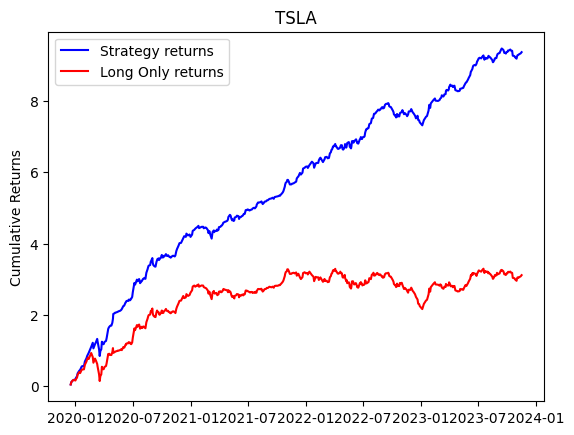

In [22]:
# Designing investment strategy
df_test['action'] = 0  

long_condition = (df_test['predicted_next_state'].apply(lambda x: x[1] in [0,1, 2, 3, 4])) 

# Criteria for going short: Negative sentiment or Aggressive category
short_condition = (df_test['predicted_next_state'].apply(lambda x: x[1] in [-1, -2, -3, -4]))

# Set 'action' to 1 for long positions
df_test.loc[long_condition, 'action'] = 1

# Set 'action' to -1 for short positions
df_test.loc[short_condition, 'action'] = -1

# Calculate returns and total returns
df_test["returns"] = df_test["close"].pct_change().shift(-1)
df_test["total_returns"] = abs(df_test["returns"]) * df_test["action"]

# print(df_test["total_returns"])

# print(df_test["action"].value_counts())

df_test['datetime'] = df_test['datetime'].apply(lambda x: x[0:10])
df_test['datetime'] = pd.to_datetime(df_test['datetime'], format="%Y-%m-%d")


plt.plot(df_test["datetime"], df_test["total_returns"].cumsum(),label="Strategy returns", color='blue')
plt.plot(df_test["datetime"], df_test["returns"].cumsum(),color='red', label="Long Only returns")
plt.legend()
plt.title(f"{ticker}")
plt.ylabel("Cumulative Returns")
plt.show()

In [23]:
df = df_test[['datetime','total_returns']]

In [27]:
df.set_index('datetime', inplace=True)

# Calculate daily returns and log returns
df['daily_returns'] = df['total_returns']
df['log_returns'] = np.log(1 + df['daily_returns'])

# Calculate cumulative returns
df['cumulative_returns'] = (1 + df['daily_returns']).cumprod() - 1

# Calculate annualized Sharpe ratio
sharpe_ratio = np.sqrt(216) * (df['daily_returns'].mean() / df['daily_returns'].std())

# Calculate maximum drawdown
cumulative_returns = df['cumulative_returns'] + 1
rolling_max = cumulative_returns.expanding(min_periods=1).max()
drawdown = cumulative_returns / rolling_max - 1
max_drawdown = drawdown.min()

# Calculate volatility (annualized standard deviation)
# volatility = np.sqrt(216) * df['log_returns'].std()
volatility = np.sqrt(216) * df['daily_returns'].std()


# Print the results
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Volatility: {volatility:.2%}")


Sharpe Ratio: 4.77
Maximum Drawdown: -49.85%
Volatility: 79.33%


In [25]:
print("hello")

hello
